In [1]:
import sys

sys.path.append('../..')


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scienceplots

from core.environment.env import Environment

In [3]:
plt.style.use('science')

In [4]:
env = Environment()

In [5]:
observation, info = env.reset()

collection id: 0


In [6]:
observation, info = env.reset()

infos = []

for _ in range(1000):
    # agent policy that uses the observation and info
    action = env.action_space.sample()
    print(action)
    observation, reward, terminated, truncated, info = env.step(action)

    infos.append(info)

    if terminated:
        print(terminated)
        # break


collection id: 0
(1, array([0.9354252], dtype=float32))
collection id: 0
(0, array([0.14883442], dtype=float32))
collection id: 0
(2, array([0.25285944], dtype=float32))
collection id: 0
(1, array([0.47971267], dtype=float32))
collection id: 0
(2, array([0.00944293], dtype=float32))
collection id: 0
(1, array([0.5145219], dtype=float32))
collection id: 0
(0, array([0.05788282], dtype=float32))
collection id: 0
(0, array([0.7082798], dtype=float32))
collection id: 0
(1, array([0.5407377], dtype=float32))
collection id: 0
(0, array([0.723535], dtype=float32))
collection id: 0
(2, array([0.7375255], dtype=float32))
collection id: 0
(1, array([0.7396029], dtype=float32))
collection id: 0
(1, array([0.915859], dtype=float32))
collection id: 0
(0, array([0.5364587], dtype=float32))
collection id: 0
(2, array([0.6407172], dtype=float32))
collection id: 0
(1, array([0.4466867], dtype=float32))
collection id: 0
(2, array([0.5946358], dtype=float32))
collection id: 0
(0, array([0.759516], dtype=

KeyboardInterrupt: 

In [ ]:
infos_df = pd.DataFrame(infos)

In [ ]:
infos_df

,usd_wallet,nft_wallet,current_price_usd
0,[nan],[nan],6230.020296
1,[nan],[nan],6388.733828
2,[nan],[nan],7057.128624
3,[nan],[nan],10281.207300
4,[nan],[nan],10976.500000
...,...,...,...
9995,[nan],[nan],503.261172
9996,[nan],[nan],582.862500
9997,[nan],[nan],533.473920
9998,[nan],[nan],518.203116


In [8]:
infos_df.sort_values(by='nft_wallet', ascending=False).head(10)

,usd_wallet,nft_wallet,current_price_usd
0,1024000,0,6230.020296
6670,[nan],[nan],64341.000000
6663,[nan],[nan],69483.450000
6664,[nan],[nan],70816.050000
6665,[nan],[nan],65349.060000
6666,[nan],[nan],65022.020000
6667,[nan],[nan],69399.150000
6668,[nan],[nan],68465.100000
6669,[nan],[nan],63148.350000
6671,[nan],[nan],59978.550000


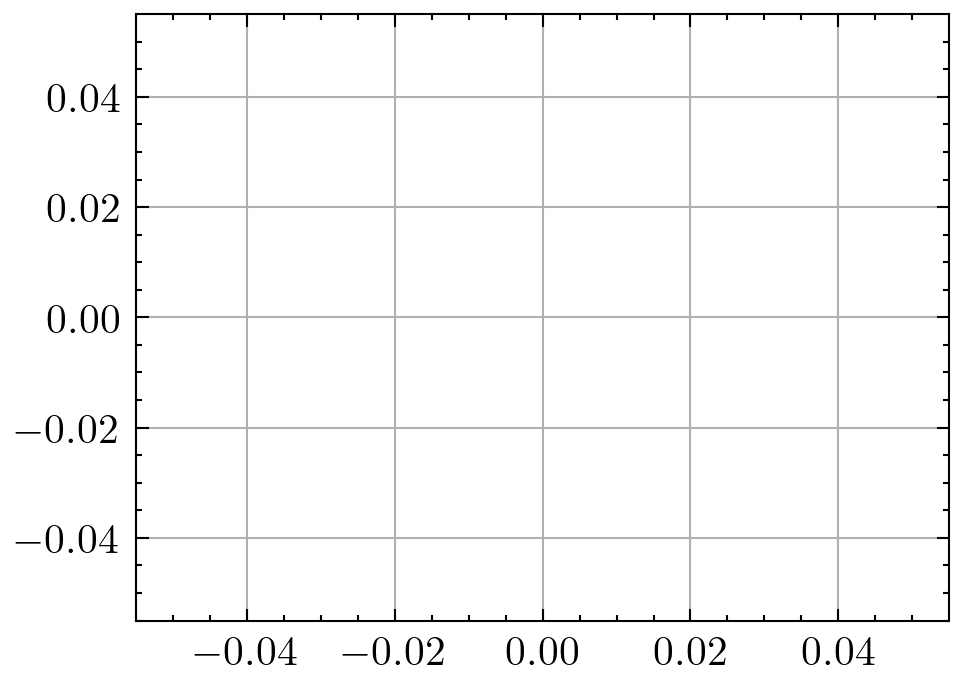

In [9]:
plt.figure(dpi=300)

plt.plot(infos_df['nft_wallet'], label='nft_wallet')
plt.grid()

plt.show()

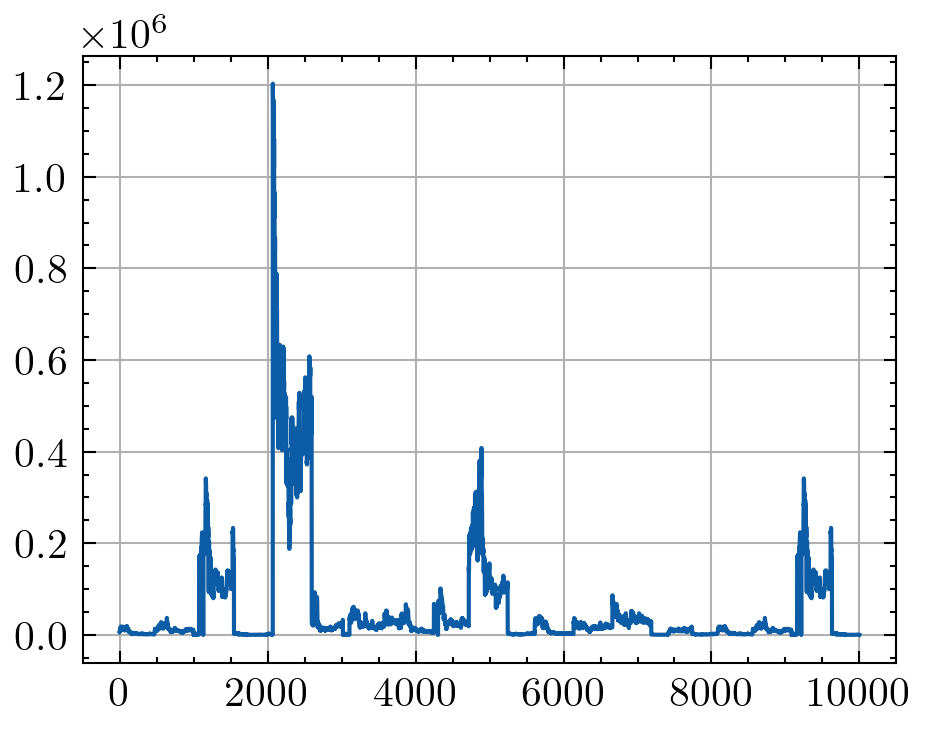

In [10]:
plt.figure(dpi=300)

plt.plot(infos_df['current_price_usd'], label='current_price_usd')
plt.grid()

plt.show()

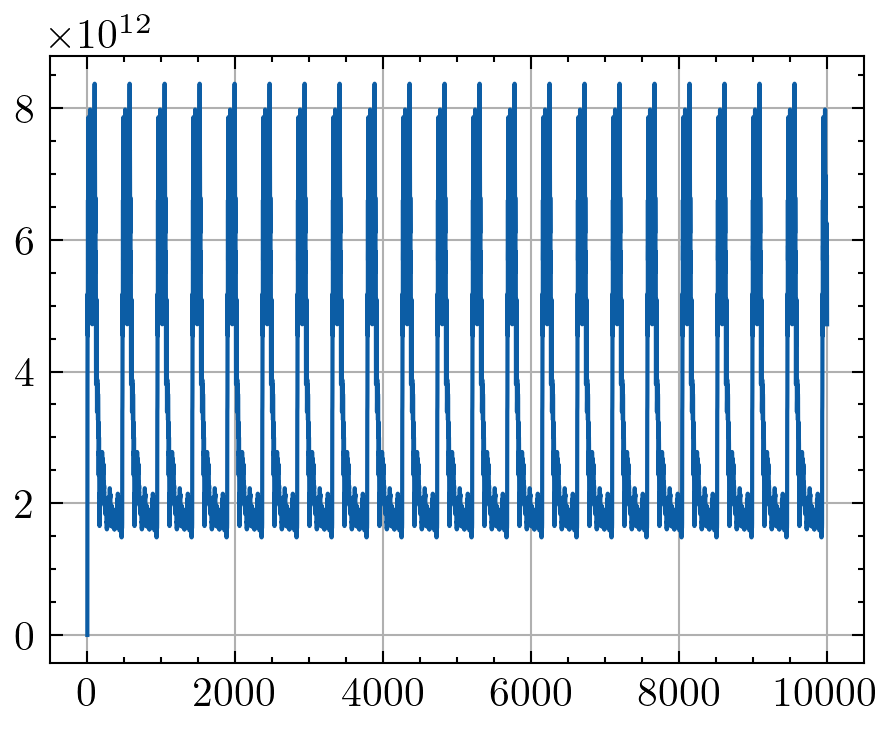

In [14]:
# net worth
plt.figure(dpi=300)

plt.plot(infos_df['usd_wallet'] + infos_df['nft_wallet'] * infos_df['current_price_usd'], label='net worth')

plt.grid()

plt.show()
